# Image Classification Model for flowers

## Importing modules

In [2]:
import tensorflow as tf
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# from keras.preprocessing.image import save_img
# from keras.preprocessing.image import img_to_array

2024-03-02 22:04:09.653406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading in, preprocessing images and created train/validation datasets

Website: https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [3]:
# Uncompressing the zip folder
!tar -xf flower_photos.tgz

In [6]:
batch_size = 32
image_height = 100
image_width = 100

In [10]:
folder_path = '/Users/shreyas/Desktop/coding_trials/jupyter projects/flower image classification/flower_photos'

train_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path, 
    validation_split = 0.2,
    subset = 'training',
    shuffle = True, 
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names

print(class_names)

['daisy', 'dandelion', 'roses_new', 'sunflowers', 'tulips']


In [7]:
autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = autotune)
val_ds = val_ds.cache().prefetch(buffer_size = autotune)

In [8]:
tf.keras.layers.Resizing(height = image_height, width = image_width)

In [9]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

TypeError: Invalid shape (1,) for image data

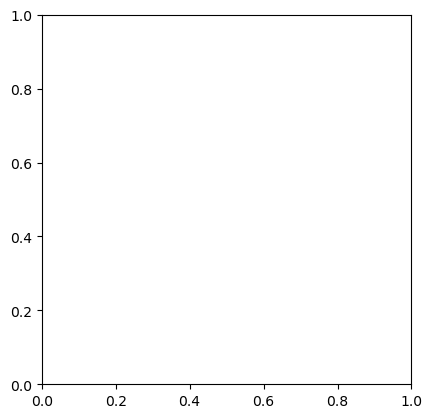

In [10]:
first_image = [0]

plt.imshow(first_image)

print(np.min(first_image), np.max(first_image))

## Defining the model

In [11]:
model = keras.Sequential([
#     rescaling layer
    layers.Rescaling(1.0/255, input_shape=(image_height, image_width, 3)),
#     defining first layer
    layers.Conv2D(64, (10, 10), activation = 'relu'),
    layers.MaxPooling2D(62, (2, 2), padding = 'same'),

    # defining second layer
    layers.Conv2D(128, (7, 7), activation = 'relu'),
    layers.MaxPooling2D(64, (2, 2), padding = 'same'),

    # defining third layer
    layers.Conv2D(128, (4, 4), activation = 'relu'),
    layers.MaxPooling2D(64, (2, 2), padding = 'same'),

    # final layer
    layers.Conv2D(256, (4, 4), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(len(class_names))    
])

In [12]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       2

In [14]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 30)

Epoch 1/30
92/92 [==============================] - 426s 5s/step - loss: 1.4917 - accuracy: 0.3437 - val_loss: 1.2969 - val_accuracy: 0.4401
Epoch 2/30
92/92 [==============================] - 1078s 12s/step - loss: 1.3531 - accuracy: 0.4125 - val_loss: 1.2994 - val_accuracy: 0.4251
Epoch 3/30
92/92 [==============================] - 437s 5s/step - loss: 1.2253 - accuracy: 0.4888 - val_loss: 1.2137 - val_accuracy: 0.4578
Epoch 4/30
92/92 [==============================] - 451s 5s/step - loss: 1.1853 - accuracy: 0.4911 - val_loss: 1.0626 - val_accuracy: 0.5640
Epoch 5/30
92/92 [==============================] - 432s 5s/step - loss: 1.1452 - accuracy: 0.5221 - val_loss: 1.1223 - val_accuracy: 0.5123
Epoch 6/30
92/92 [==============================] - 432s 5s/step - loss: 1.1226 - accuracy: 0.5358 - val_loss: 1.0550 - val_accuracy: 0.5695
Epoch 7/30
92/92 [==============================] - 435s 5s/step - loss: 1.0637 - accuracy: 0.5480 - val_loss: 1.0290 - val_accuracy: 0.5668
Epoch 8/30


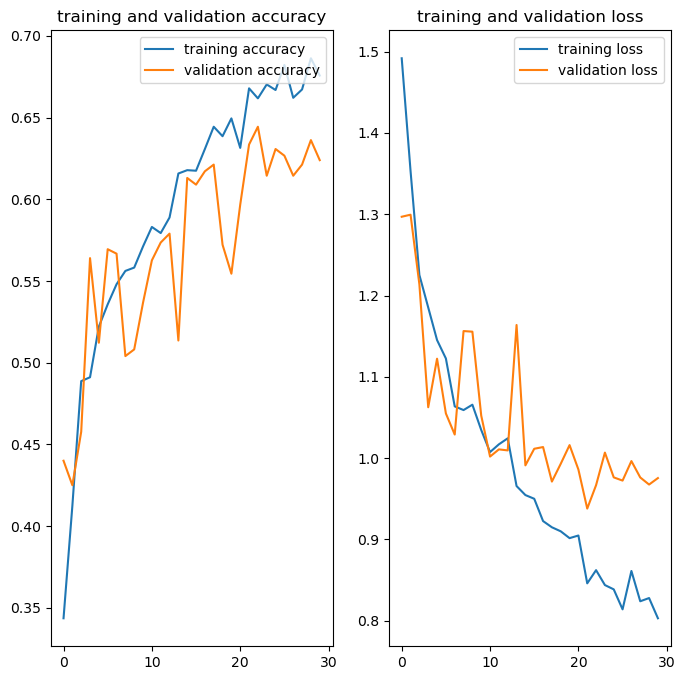

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label = 'training accuracy')
plt.plot(epochs_range, val_accuracy, label = 'validation accuracy')
plt.legend(loc = 'upper right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'training loss')
plt.plot(epochs_range, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')


plt.show()

In [36]:
first_model_path = '/Users/shreyas/Desktop/coding trials/jupyter projects/flower image classification/first_model.h5'
tf.keras.Model.save(model, filepath = first_model_path, save_format = 'h5')

## New improved model

In [18]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1)
    ])

In [19]:
new_model = keras.Sequential([
    
    data_augmentation,    
    layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(len(class_names))    
])

In [20]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(min_delta  = 0.001, 
                                         patience = 10, 
                                         restore_best_weights = True)

In [21]:
new_model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  metrics = ['accuracy']
                 )

new_history = new_model.fit(train_ds, 
              validation_data = val_ds,
              epochs = 30, 
              callbacks = [early_stopping])

Epoch 1/30
92/92 [==============================] - 11s 87ms/step - loss: 1.2791 - accuracy: 0.4659 - val_loss: 1.0364 - val_accuracy: 0.5763
Epoch 2/30
92/92 [==============================] - 8s 85ms/step - loss: 1.0219 - accuracy: 0.6005 - val_loss: 0.9789 - val_accuracy: 0.6253
Epoch 3/30
92/92 [==============================] - 8s 84ms/step - loss: 0.9360 - accuracy: 0.6369 - val_loss: 0.9931 - val_accuracy: 0.6144
Epoch 4/30
92/92 [==============================] - 8s 88ms/step - loss: 0.8690 - accuracy: 0.6649 - val_loss: 0.9387 - val_accuracy: 0.6540
Epoch 5/30
92/92 [==============================] - 9s 94ms/step - loss: 0.8228 - accuracy: 0.6846 - val_loss: 0.9853 - val_accuracy: 0.6158
Epoch 6/30
92/92 [==============================] - 8s 84ms/step - loss: 0.7791 - accuracy: 0.6894 - val_loss: 0.9918 - val_accuracy: 0.6199
Epoch 7/30
92/92 [==============================] - 8s 85ms/step - loss: 0.7417 - accuracy: 0.7050 - val_loss: 0.8117 - val_accuracy: 0.6839
Epoch 8/30
9

In [27]:
new_accuracy = new_history.history['accuracy']
new_val_accuracy = new_history.history['val_accuracy']

new_loss = new_history.history['loss']
new_val_loss = new_history.history['val_loss']

Text(0.5, 1.0, 'new training and validation loss')

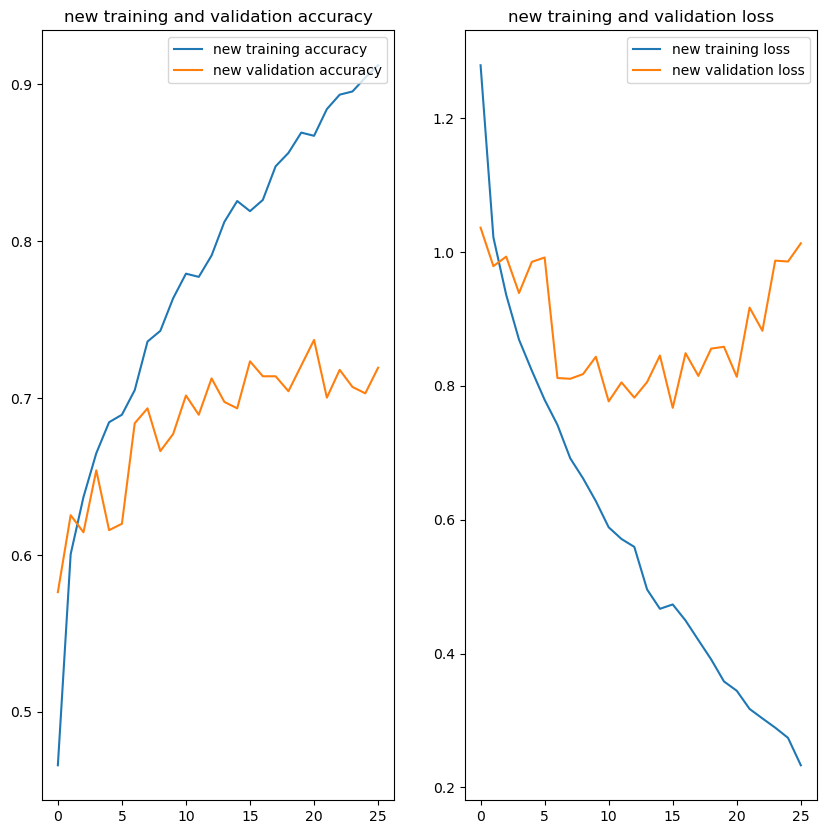

In [32]:
epochs_range = range(26)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, new_accuracy, label = 'new training accuracy')
plt.plot(epochs_range, new_val_accuracy, label = 'new validation accuracy')
plt.legend(loc = 'upper right')
plt.title('new training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, new_loss, label = 'new training loss')
plt.plot(epochs_range, new_val_loss, label = 'new validation loss')
plt.legend(loc = 'upper right')
plt.title('new training and validation loss')

In [35]:
save_model_path = '/Users/shreyas/Desktop/coding trials/jupyter projects/flower image classification/new_model.h5'
tf.keras.Model.save(new_model, filepath = save_model_path, save_format = 'h5')

## Testing the model

In [40]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('red_sunflower', origin = sunflower_url)

test_img = tf.keras.utils.load_img(
    sunflower_path, target_size=(100, 100)
)
test_img_array = tf.keras.utils.img_to_array(test_img)
test_img_array = tf.expand_dims(test_img_array, 0) # Create a batch

predictions = new_model.predict(test_img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to the class of {} with {:.2f} percent accuracy."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to the class of sunflowers with 94.13 percent accuracy.


1/1 [==============================] - 0s 49ms/step
This image most likely belongs to the class of roses_new with 92.14 percent accuracy.


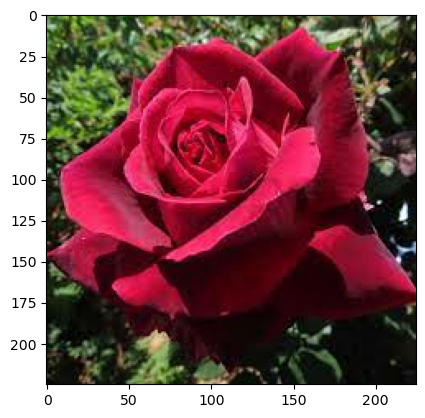

In [13]:
test_file_path = '/Users/shreyas/Desktop/wildrose.jpeg'
# displaying the image
byte_pic = tf.io.read_file(test_file_path)
img = tf.io.decode_jpeg(byte_pic)

test_img2 = tf.keras.utils.load_img(test_file_path, target_size = (100, 100))
test_img_array2 = tf.keras.utils.img_to_array(test_img2)
test_img_array2 = tf.expand_dims(test_img_array2, 0) # Create a batch

new_model = tf.keras.models.load_model(filepath='/Users/shreyas/Desktop/coding_trials/jupyter projects/flower image classification/new_model.h5')

predictions = new_model.predict(test_img_array2)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)
print(
    "This image most likely belongs to the class of {} with {:.2f} percent accuracy."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))